# Importing and exporting data

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline  
# make the plot showed directly under codes and saved in notebook

from sklearn.linear_model import LinearRegression

In [4]:
#import from url
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df=pd.read_csv(url, header = None)

In [128]:
df.head(5)          #show first few rows
df.tail(5)          #show last few rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
#replace default headers
headers=['symboling', 'normalized-losses', 'make', 'fuel-type', 
                    'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                    'engine-location', 'wheel-base', 'length', 'width', 'height',
                    'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
                    'fuel-system', 'bore', 'stroke', 'compression-ratio',
                    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.columns=headers
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [6]:
#exporting data
path="c:\Windos\...\filename.csv"
df.to_csv(path)
# .to_excel()  .to_sql() .to_json()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Windos\\...\x0cilename.csv'

In [8]:
#check data type
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
#statistical summary   mean, std, quartiles
df.describe()   #numeric only
df.describe(include="all")
df[["name1","name2"]].describe()   #summary of particular variables

KeyError: "['name1' 'name2'] not in index"

In [10]:
df.info   # top & bottom 30 rows

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
5            2                 ?         audi       gas        std   
6            1               158         audi       gas        std   
7            1                 ?         audi       gas        std   
8            1               158         audi       gas      turbo   
9            0                 ?         audi       gas      turbo   
10           2               192          bmw       gas        std   
11           0               192          bmw       gas        std   
12           0               188          bmw       gas   

# exploratory data analysis

In [11]:
df.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
#count by group  .value_counts()
drive_wheels_count=df["drive-wheels"].value_counts()
drive_wheels_count.rename(columns={"drive-wheels":"value_counts"}, inplace=True)   #replace column name "old name":"new name"
drive_wheels_count.index.name="drive wheels"
drive_wheels_count
df["drive-wheels"].value_counts().idxmax()      # show the value with max frequency

'fwd'

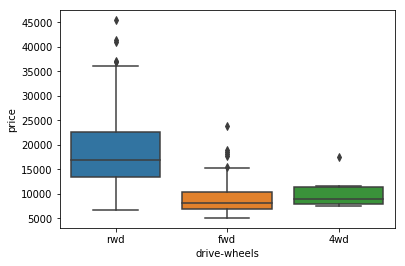

In [94]:
#box plot

sns.boxplot(x="drive-wheels", y="price", data=df)

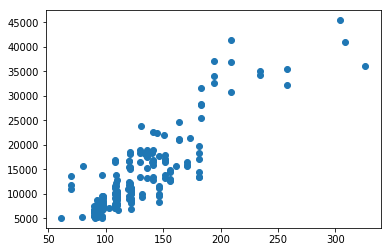

In [93]:
#scatter plot
x=df["engine-size"]
y=df["price"]
%matplotlib inline 
mpl.pyplot.scatter(x,y)

# Data cleansing

In [129]:
df["price"]=df["price"].replace("?", np.NaN)   #np.nan  missing value in np package
                                               # 或 df["price"].replace("?", np.nan, inplace = True)

missing_data=df.isnull()                      # .isnull() or .notnull() test missing value
missing_data.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# count missing values
for column in missing_data.columns.values.tolist():     #获取列列表名
    print(column)
    print (missing_data[column].value_counts())         # count
    print("")    

NameError: name 'missing_data' is not defined

In [130]:
#drop NA
df.dropna()    # axis = 0  drops the entire row   or axis=1 drop column
df.dropna(subset=["price"], axis=0, inplace=True)   # !! inplace=True 在原数据中做修改  等于dr=df.dropna(subset..., axis=0)
df.reset_index(drop=True, inplace=True)             # reset index after dropping


In [ ]:
#replace by mean value
mean=df["variable name"].mean(axis=0)               # axis=0 drop na
df["variable name"].replace(np.nan, mean)           #np.nan  missing value in np package

In [16]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [36]:
#change data type
df["price"].dtypes

df["price"]=df["price"].astype("int")

In [18]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [19]:
# normalization

# method 1: devide max
df["length"]=df["length"]/df["length"].max()

# method2: z-score
df["length"]=(df["length"]-df["length"].mean())/df["length"].std()

Text(0.5,1,'price bins')

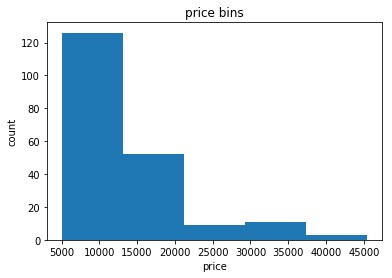

In [66]:
# histagram
from matplotlib import pyplot

mpl.pyplot.hist(df['price'], bins=5)


# set x/y labels and plot title
mpl.pyplot.xlabel("price")
mpl.pyplot.ylabel("count")
mpl.pyplot.title("price bins")

In [140]:
# binning

df["price"]=df["price"].astype(float, copy=True)          # must be numeric

# return 4 equally splitted numbers
bins = np.linspace(min(df["price"]), max(df["price"]),4)  
# create group names
group_names=["Low", "Medium", "High"]
# cut function: segment and sort
df["price_binned"]=pd.cut(df["price"], bins, labels=group_names, include_lowest=True)

In [26]:
# bar plot
pyplot.bar(group_names, df["price_binned"].value_counts())

NameError: name 'group_names' is not defined

In [96]:
# get categorical data groups
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [27]:
# turning into categorical data
# turning into dummy variables
dummy_variable_1=pd.get_dummies(df['fuel-type'])
dummy_variable_1.rename(columns={"fuel-type-diesel":"gas", "fuel-type-diesel":"diesel"}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [124]:
# merge dummy variables back to table
df = pd.concat([df, dummy_variable_1], axis=1)
df.head()

RecursionError: maximum recursion depth exceeded while calling a Python object

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [98]:
# grouping
df_group=df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'], as_index=False).mean()

# showing in pivot table  
df_pivot=df_group.pivot(index='drive-wheels', columns='body-style')
df_pivot = df_pivot.fillna(0) #fill missing values with 0
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

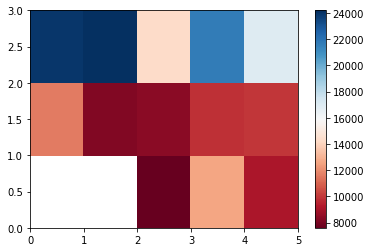

In [82]:
# heatmap
pyplot.pcolor(df_pivot, cmap='RdBu')
pyplot.colorbar()                           
pyplot.show()

(0, 55891.425191299415)

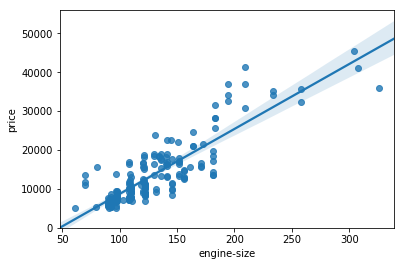

In [92]:
#correlation
df.corr()
sns.regplot(x='engine-size', y='price', data=df)
pyplot.ylim(0,)                                       # y axit starting point

In [108]:
# ANOVA
from scipy import stats
df_anova=df[['make','price']]
group_anova=df_anova.groupby(['make'])
anova1=stats.f_oneway(group_anova.get_group('honda')['price'],group_anova.get_group('subaru')['price'])
anova1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

ValueError: could not convert string to float: '?'

In [144]:
# convert horsepower to int/float
df["horsepower"].dtypes
df["horsepower"]=df["horsepower"].replace("?", np.NaN)
df.dropna(subset=["horsepower"], axis=0, inplace=True) 
df["horsepower"]=df["horsepower"].astype('int')
df["price"].dtypes

# Pearson corr
pearson_coef, p_value =stats.pearsonr(df['horsepower'], df['price'])
pearson_coef, p_value

(0.8105330821322063, 1.1891278276946011e-47)

In [132]:
df[['horsepower']].head(5) 

,horsepower
0,111
1,111
2,154
3,102
4,115
